# Medienverarbeitung Color and Tone Correction

### Slider

In [1]:
import PIL

In [2]:
from PIL import ImageEnhance

In [3]:
import numpy as np

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
import cv2

In [6]:
import matplotlib.pyplot as plt

In [7]:
imagefile='Zurich-RAW-to-DSLR-Dataset/full_resolution/huawei_visualized/190.png'

In [8]:
img = PIL.Image.open(imagefile)

In [9]:
reduced_img = img.reduce(5)

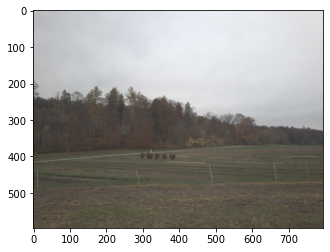

In [10]:
plt.imshow(reduced_img)

In [11]:
def f(x):
    preview_img = reduced_img
    converter = PIL.ImageEnhance.Brightness(reduced_img)
    img2 = converter.enhance(x/100)
    plt.imshow(img2)

In [12]:
interact(f, x=100);

interactive(children=(IntSlider(value=100, description='x', max=300, min=-100), Output()), _dom_classes=('widg…

In [13]:
def g(x):
    preview_img = reduced_img
    converter = PIL.ImageEnhance.Color(reduced_img)
    img3 = converter.enhance(x/100)
    plt.imshow(img3)

In [14]:
interact(g, x=200);

interactive(children=(IntSlider(value=200, description='x', max=600, min=-200), Output()), _dom_classes=('widg…

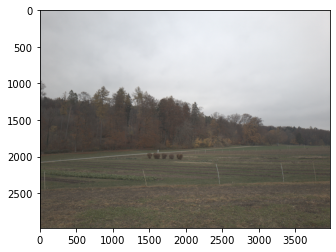

In [15]:
plt.imshow(img)

In [16]:
img = cv2.imread(imagefile)

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

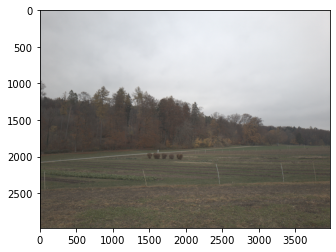

In [19]:
plt.imshow(img)

In [20]:
brightness = -2
contrast = -5
img = np.int16(img)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)

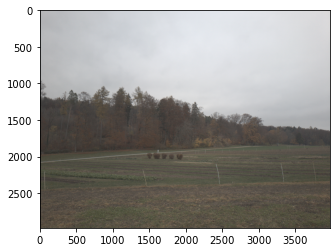

In [21]:
plt.imshow(img)

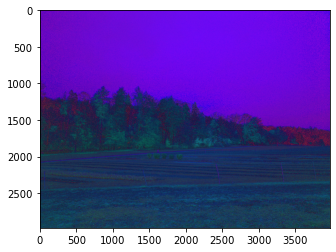

In [22]:
plt.imshow(hsv)

In [23]:
hsv

array([[[ 85,   8, 186],
        [ 86,  10, 187],
        [ 87,  15, 189],
        ...,
        [ 90,   5, 221],
        [140,   4, 218],
        [143,   5, 217]],

       [[ 90,   3, 186],
        [ 83,   5, 187],
        [ 90,   9, 188],
        ...,
        [ 96,   6, 222],
        [135,   2, 219],
        [150,   2, 218]],

       [[167,   9, 192],
        [162,   7, 190],
        [135,   3, 187],
        ...,
        [107,   8, 224],
        [120,   1, 222],
        [  0,   2, 223]],

       ...,

       [[ 16,  40,  83],
        [ 18,  46,  83],
        [ 25,  57,  80],
        ...,
        [ 18,  71,  79],
        [ 25,  43,  72],
        [ 34,  25,  70]],

       [[ 19,  34,  82],
        [ 20,  46,  84],
        [ 23,  68,  86],
        ...,
        [ 14,  63,  77],
        [ 16,  46,  72],
        [ 17,  33,  70]],

       [[ 22,  34,  82],
        [ 22,  46,  84],
        [ 23,  72,  89],
        ...,
        [ 11,  63,  77],
        [ 12,  46,  72],
        [ 12,  36,  70]]

In [24]:
brightness = 50
contrast = 50
hsv = np.int16(hsv)
hsv = hsv * (contrast/127+1) - contrast + brightness
hsv = np.clip(hsv, 0, 255)
hsv = np.uint8(hsv)

In [25]:
#hsv=hsv*1.5

In [26]:
#hsv=hsv*0.66

In [27]:
new_img=cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

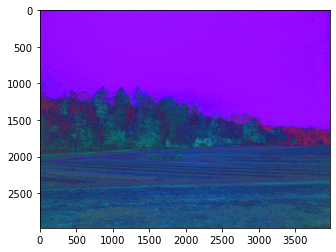

In [28]:
plt.imshow(hsv)

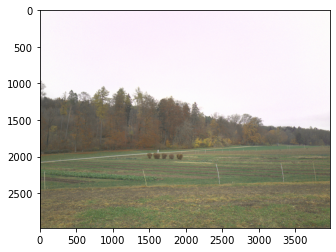

In [29]:
plt.imshow(new_img)

In [30]:
new_img=cv2.pyrMeanShiftFiltering(new_img,20,20)

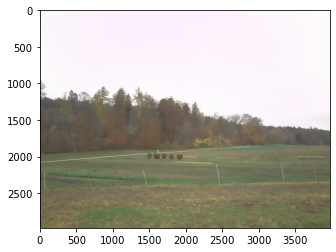

In [31]:
plt.imshow(new_img)